<a href="https://colab.research.google.com/github/varnikanalla/vptv/blob/main/no_of_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload an image...


Saving chess.webp to chess (2).webp


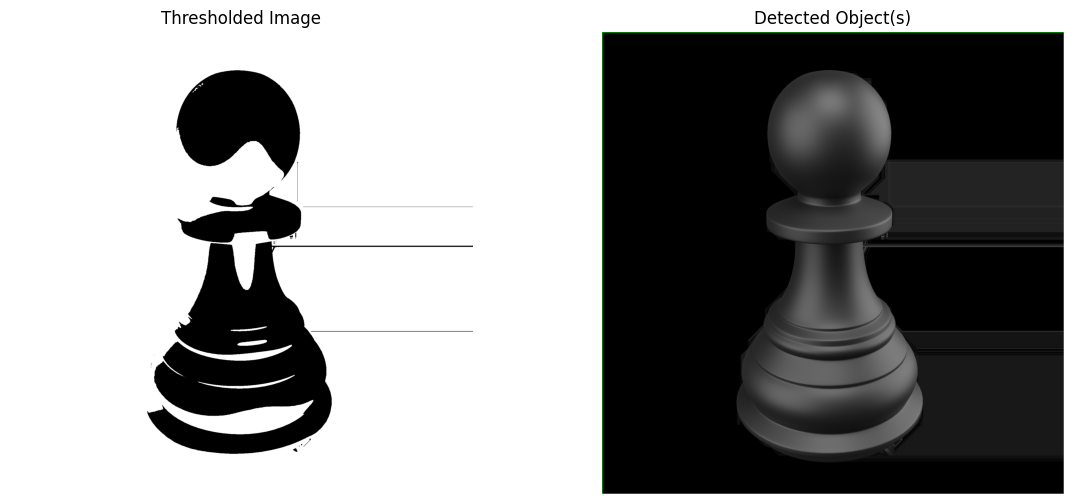

Number of objects detected: 1


In [14]:
# Install required libraries
!pip install opencv-python-headless matplotlib

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
print("Please upload an image...")
uploaded = files.upload()

# Automatically get the uploaded file name
for filename in uploaded.keys():
    image_path = '/content/' + filename

# Load the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to create binary image
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological Closing (fill small holes inside the object)
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Object(s)')
plt.imshow(output)
plt.axis('off')

plt.show()

# Print number of detected objects
print("Number of objects detected:", len(contours))
